**2η Εργαστηριακή Άσκηση στο μάθημα Ψηφιακή Επεξεργασία Σήματος 2024**

| Ονοματεπώνυμα | ΑΜ |
|----------------|----|
| Γεώργιος Αλέξανδρος Γεωργαντζάς        | 03120017 |
| Βλάσιος Σκουλής        | 03120065 |

**Μέρος 1ο - Ψυχοακουστικό Μοντέλο 1**

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write
import scipy as sp
import IPython
import soundfile as sf

**Μέρος 1ο**

In [154]:
# 1.0

# Read the stereo audio file
fs, music_stereo = sp.io.wavfile.read('./dsp24_material_lab2/music_dsp2024.wav')

# Convert stereo to mono
music = np.mean(music_stereo, axis=1)

# Normalize the audio to range from -1 to 1
max_abs = np.max(np.abs(music))
music = music / max_abs

# Create time array
time = np.arange(len(music)) / fs

# Plot the normalized mono audio in time domain
fig = plt.figure(figsize=(20, 4))
plt.plot(time, music)
plt.xlabel('Time')
plt.title('Normalized music_dsp2024.wav file')
plt.grid(True)
plt.show()

# Display the normalized mono audio
IPython.display.display(IPython.display.Audio(data=music, rate=fs))

/var/folders/0s/3zzp9lz97h34qxk2kjr5c5wh0000gn/T/ipykernel_40940/1120343008.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music_stereo = sp.io.wavfile.read('./dsp24_material_lab2/music_dsp2024.wav')


In [155]:
# 1.1

def bark_scale(f):
    """
    Frequency (Hz) to Bark scale converter
    
    Args:
    f: input array of frequencies in Hz
    
    Returns:
    b: frequencies converted to Bark scale
    """
    b = 13 * np.arctan(0.00076 * f) + 3.5 * np.arctan((f / 7500) ** 2)
    return b

In [156]:
# 1.1

# Define parameters
L = 512  # Length of each segment
N = 512  # FFT size
hop_size = 0  # Hop size between segment
PN = 90.302

# Create hanning and rectangular windows
hanning = np.hanning(L)

# Pad music so that it can be segmented by hanning windows
pad_width = len(hanning) - len(music) % len(hanning)
music_padded = np.pad(music, pad_width=(0, pad_width), mode='constant', constant_values=0)

# Initialize list to store FFT results. Each element in this list is another list that contains the fft results of each window.
# That means that this list is of size rows x columns, where the number of rows is equal to the number of samples return by fft (512)
# while the number of columns is equal to the number of segments we got by splitting the signal (1417).
segments_fft_list = []

# Initialize list to store Power Spectrum results. 
P_k = []

# Segment total signal into windows, apply windows, and compute FFT
for i in range(0, len(music_padded), L+hop_size):
    segment = music_padded[i:i+L] * hanning
    segment_fft = np.fft.fft(segment, N)
    segment_fft = np.abs(segment_fft)
    segments_fft_list.append(segment_fft)

# Calculate Power Spectrum of each window
for window_fft in segments_fft_list:
    P_k.append((PN+10*np.log10(window_fft**2))[:N//2])

# P_k is a 2D numpy array. It should of dimensions 256 x 1417. Each of the 1417 columns represent a segment of our original signal.
# Each segment contains 256 points. So P_k stores the power spectrum results for each window, in each column. 
P_k = np.array(P_k).transpose()

#Parameters for plotting
segment_time_duration = np.linspace(0, L-1, L)
segment_time_duration = segment_time_duration/fs

# We will use 2 windows for plotting, in order to present our results for the rest of this exercise.
window_0 = 500 
window_1 = 1000

# DFT returnes samples. Not real frequencies. We use np.fft.fftfreq() to translate to real frequency content in Hz.
freqs = np.fft.fftfreq(N, d=1/fs)
freqs = abs(freqs[1:N//2+1])

# From Hz to Bark
bark_freqs = bark_scale(freqs)

In [157]:
# 1.1

# Plotting Starts
plt.figure(figsize=(10, 8))

# Plot window_0 in time domain
plt.subplot(2, 3, 1)
plt.plot(segment_time_duration, music[N*window_0:N*(window_0+1)])
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude')
plt.title('Window 500 in time domain')
plt.grid(True)

# Plot the power spectrum of window_0 in relation to real frequency (Hz)
plt.subplot(2, 3, 2)
plt.plot(freqs, P_k[:, window_0])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB SPL)')
plt.title('Power Spectrum of Window 500')
plt.grid(True)

# Plot the power spectrum of window_0 in relation to bark
plt.subplot(2, 3, 3)
plt.plot(bark_freqs, P_k[:, window_0])
plt.xlabel('Critical Band (Bark)')
plt.ylabel('Power (dB SPL)')
plt.title('Power Spectrum of Window 500')
plt.grid(True)

# Plot window_1 in time domain
plt.subplot(2, 3, 4)
plt.plot(segment_time_duration, music[N*window_1:N*(window_1+1)])
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude')
plt.title('Window 1000 in time domain')
plt.grid(True)

# Plot the power spectrum of window_1 in relation to real frequency (Hz)
plt.subplot(2, 3, 5)
plt.plot(freqs, P_k[:, window_1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB SPL)')
plt.title('Power Spectrum of Window 1000')
plt.grid(True)

# Plot the power spectrum of window_1 in relation to bark
plt.subplot(2, 3, 6)
plt.plot(bark_freqs, P_k[:, window_1])
plt.xlabel('Critical Band (Bark)')
plt.ylabel('Power (dB SPL)')
plt.title('Power Spectrum of Window 1000')
plt.grid(True)
# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [158]:
# 1.2

def dk(k):
    if 2 < k < 63:
        D_k = [2, 2]
    elif k < 127:
        D_k = [2, 3]
    elif k <= 250:
        D_k = [2, 6]
    else:
        D_k = [0, 0]
    return D_k

In [159]:
# 1.2

# Load P_NM
P_NM = np.load("./dsp24_material_lab2/P_NM-24.npy")

def find_masks(window):
    """
    Find tonal masks based on the power spectrum.

    Args:
    window: Power Spectrum of a Window

    Returns:
    ST: Boolean array indicating tonal masks of input window
    """

    st = np.zeros_like(window, dtype=bool)  # Initialize tonal mask array

    # Find tonal masks
    for k in range(2, 250):
        d1, d2 = dk(k)
        if window[k] > window[k - 1] and window[k] > window[k + 1]:
            st[k] = 1
            for i in range(d1, d2):
                if not(window[k] > window[k - i] + 7 and window[k] > window[k + i] + 7):
                    st[k] = 0
    return st


# ST is a boolean 2D array. Should be of shape (256,1417). It contains 0s everywhere, except from where there are tonal masks detected.
ST = np.zeros_like(P_k)

# P_TM is to store the power of each tonal mask. Should be of shape (256, 1417).
P_TM = np.zeros_like(ST)
#Find tonal masks off all windows
for window in range(P_k.shape[1]):
    ST[:, window] = find_masks(P_k[:, window])
    coords_of_tonal_masks = np.where(ST[:, window] > 0)
    for k in coords_of_tonal_masks:
        P_TM[k, window] = 10 * np.log10(10**(0.1 * P_k[k, window]) + 10**(0.1 * P_k[k, window]) + 10**(0.1 * P_k[k, window]))

In [160]:
# Plotting
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(bark_freqs, P_k[:, window_0], color='blue')
# Overlay positions of tonal masks with red color
mask_indices = np.where(P_TM[:, window_0] != 0)[0]
noise_mask_indices = np.where(P_NM[:, window_0] != 0)[0]
plt.plot(bark_freqs[mask_indices], P_k[mask_indices, window_0], 'ro', label='Tonal Maskers', markersize=3)
plt.plot(bark_freqs[noise_mask_indices], P_k[noise_mask_indices, window_0], 'o', color='lime', label='Noise Maskers', markersize=3)
# Set labels and title
plt.xlabel('Critical Band (Bark)')
plt.ylabel('Power (dB SPL)')
plt.title('Maskers on Power Spectrum Window 500')
plt.legend()
plt.grid()
# Add legend at bottom left

plt.subplot(1, 2, 2)
plt.plot(bark_freqs, P_k[:, window_1], color='blue')
# Overlay positions of tonal masks with red color
mask_indices = np.where(P_TM[:, window_1] != 0)[0]
noise_mask_indices = np.where(P_NM[:, window_1] != 0)[0]
plt.plot(bark_freqs[mask_indices], P_k[mask_indices, window_1], 'ro', label='Tonal Maskers', markersize=3)
plt.plot(bark_freqs[noise_mask_indices], P_k[noise_mask_indices, window_1], 'o', color='lime', label='Noise Maskers', markersize=3)
# Set labels and title
plt.xlabel('Critical Band (Bark)')
plt.ylabel('Power (dB SPL)')
plt.title('Maskers on Power Spectrum Window 1000')
# Add legend at bottom left
plt.legend()
plt.grid()
# Show plot
plt.tight_layout()
plt.show()

In [161]:
plt.stem(bark_freqs, P_TM[:, window_0]**2, linefmt='', markerfmt='bo', basefmt=' ')
plt.xlabel('Critical Band (Bark)')
plt.ylabel('Power dB^2')
plt.title("Power of Tonal Maskers")
plt.grid()

In [162]:
# 1.3

# Load P_NMc
P_NMc = np.load("./dsp24_material_lab2/P_NMc-24.npy")

# Load P_TMc
P_TMc = np.load("./dsp24_material_lab2/P_TMc-24.npy")

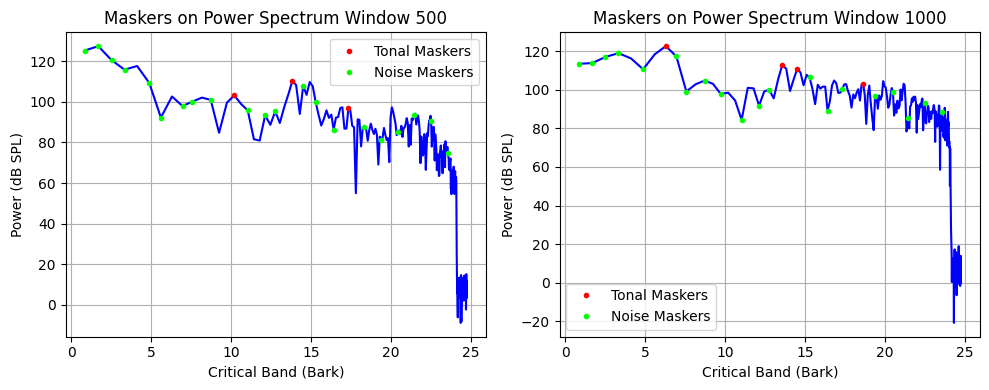

In [163]:
# 1.3

# Plotting
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(bark_freqs, P_k[:, window_0], color='blue')
# Overlay positions of tonal masks with red color
mask_indices = np.where(P_TMc[:, window_0] != 0)[0]
noise_mask_indices = np.where(P_NMc[:, window_0] != 0)[0]
plt.plot(bark_freqs[mask_indices], P_k[mask_indices, window_0], 'ro', label='Tonal Maskers', markersize=3)
plt.plot(bark_freqs[noise_mask_indices], P_k[noise_mask_indices, window_0], 'o', color='lime', label='Noise Maskers', markersize=3)
# Set labels and title
plt.xlabel('Critical Band (Bark)')
plt.ylabel('Power (dB SPL)')
plt.title('Maskers on Power Spectrum Window 500')
plt.legend()
plt.grid()
# Add legend at bottom left

plt.subplot(1, 2, 2)
plt.plot(bark_freqs, P_k[:, window_1], color='blue')
# Overlay positions of tonal masks with red color
mask_indices = np.where(P_TMc[:, window_1] != 0)[0]
noise_mask_indices = np.where(P_NMc[:, window_1] != 0)[0]
plt.plot(bark_freqs[mask_indices], P_k[mask_indices, window_1], 'ro', label='Tonal Maskers', markersize=3)
plt.plot(bark_freqs[noise_mask_indices], P_k[noise_mask_indices, window_1], 'o', color='lime', label='Noise Maskers', markersize=3)
# Set labels and title
plt.xlabel('Critical Band (Bark)')
plt.ylabel('Power (dB SPL)')
plt.title('Maskers on Power Spectrum Window 1000')
# Add legend at bottom left
plt.legend()
plt.grid()
# Show plot
plt.tight_layout()
plt.show()


In [164]:
# 1.4

def SF(db, power):
    sf = 0
    if db >= -3 and db < -1:
        sf = 17*db-.4*power+11
    elif db >= -1 and db < 0:
        sf = (.4*power+6)*db
    elif db >= 0 and db < 1:
        sf = -17*db
    elif db >= 1 and db < 8:
        sf = (.15*power-17)*db-.15*power
    return sf

def T_M(P_M, noise=False):                 
    t_m_total = np.zeros((P_M.shape[0], P_M.shape[1], P_M.shape[0]))
    for window in range(P_M.shape[1]):
        t_m = np.zeros((P_M.shape[0],  P_M.shape[0]))
        discrete_coords = np.where(P_M[:, window] > 0)[0]
        for j in discrete_coords:
            power = P_M[j, window]
            for i in range(t_m.shape[0]):
                freq_i = freqs[i]
                freq_j = freqs[j]
                db = bark_scale(freq_i)-bark_scale(freq_j)
                flag = True
                if not(db >= -3 and db < 8):
                    flag = False
                if noise:
                    t_m_total[j, window, i] = power-0.175*bark_scale(freq_j)+SF(db, power)-2.025 if flag else 0
                else:
                    t_m_total[j, window, i] = power-0.275*bark_scale(freq_j)+SF(db, power)-6.025 if flag else 0
    return t_m_total

In [165]:
# 1.4

T_TM = T_M(P_TMc)

In [166]:
# 1.4

T_NM = T_M(P_NMc, True)

In [167]:
# 1.5
def abs_thresh(f):
    return 3.64 * (f / 1000) ** (-0.8) - 6.5 * np.exp(-0.6 * (f / 1000 - 3.3) ** 2) + 10 ** (-3) * (f / 1000) ** 4

def T(t_nm, t_tm):
    t_g = np.zeros((t_nm.shape[0], t_nm.shape[1]))
    for window in range(t_nm.shape[1]):
        for i in range(t_nm.shape[2]):
            sum_tm = np.sum(10**(0.1*t_tm[:, window, i]))
            sum_nm = np.sum(10**(0.1*t_nm[:, window, i]))
            Tq = abs_thresh(freqs[i]) if i > 0 else 40
            t_g[i, window] = 10*np.log10(10**(0.1*Tq)+sum_tm+sum_nm)
    return t_g

T_g = T(T_NM, T_TM)

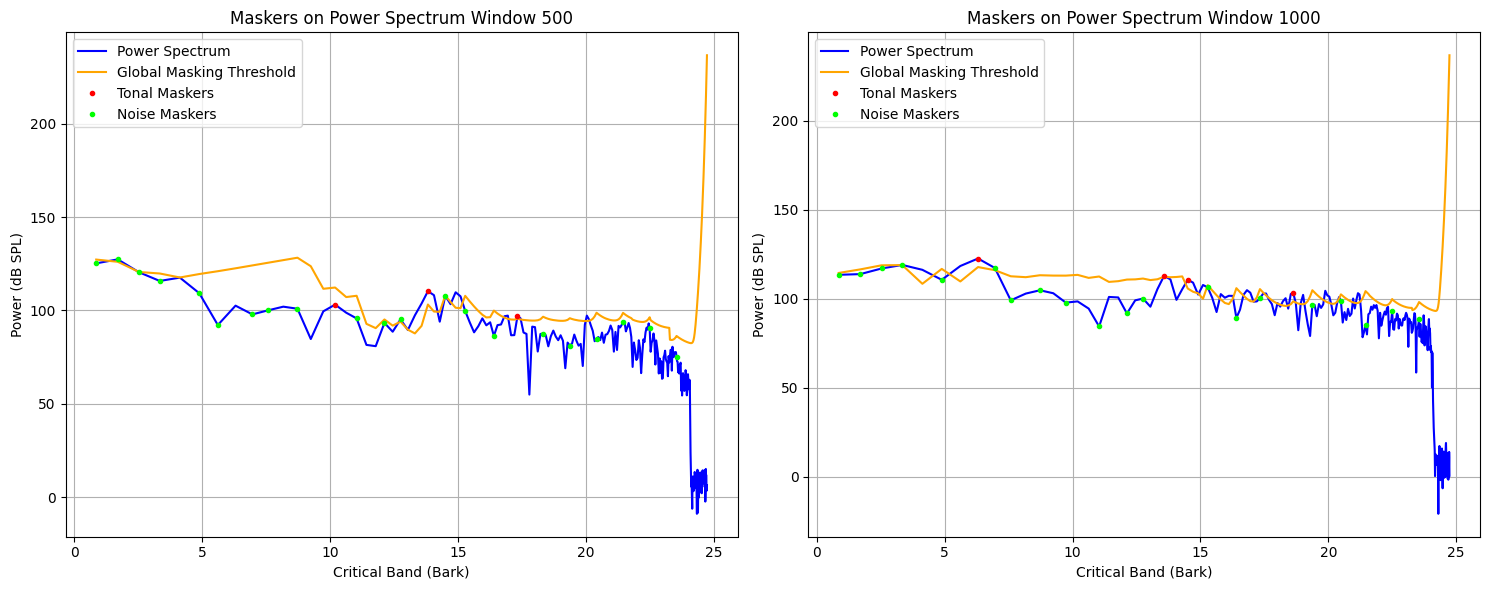

In [168]:
# 1.5

# Plotting
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(bark_freqs, P_k[:, window_0], color='blue', label='Power Spectrum')
plt.plot(bark_freqs, T_g[:, window_0], color='orange', label='Global Masking Threshold')
# Overlay positions of tonal masks with red color
mask_indices = np.where(P_TMc[:, window_0] != 0)[0]
noise_mask_indices = np.where(P_NMc[:, window_0] != 0)[0]
plt.plot(bark_freqs[mask_indices], P_k[mask_indices, window_0], 'ro', label='Tonal Maskers', markersize=3)
plt.plot(bark_freqs[noise_mask_indices], P_k[noise_mask_indices, window_0], 'o', color='lime', label='Noise Maskers', markersize=3)
# Set labels and title
plt.xlabel('Critical Band (Bark)')
plt.ylabel('Power (dB SPL)')
plt.title('Maskers on Power Spectrum Window 500')
plt.legend()
plt.grid()
# Add legend at bottom left

plt.subplot(1, 2, 2)
plt.plot(bark_freqs, P_k[:, window_1], color='blue', label='Power Spectrum')
plt.plot(bark_freqs, T_g[:, window_1], color='orange', label='Global Masking Threshold')
# Overlay positions of tonal masks with red color
mask_indices = np.where(P_TMc[:, window_1] != 0)[0]
noise_mask_indices = np.where(P_NMc[:, window_1] != 0)[0]
plt.plot(bark_freqs[mask_indices], P_k[mask_indices, window_1], 'ro', label='Tonal Maskers', markersize=3)
plt.plot(bark_freqs[noise_mask_indices], P_k[noise_mask_indices, window_1], 'o', color='lime', label='Noise Maskers', markersize=3)
# Set labels and title
plt.xlabel('Critical Band (Bark)')
plt.ylabel('Power (dB SPL)')
plt.title('Maskers on Power Spectrum Window 1000')
# Add legend at bottom left
plt.legend()
plt.grid()
# Show plot
plt.tight_layout()
plt.show()


**Μέρος 2ο**

<function matplotlib.pyplot.show(close=None, block=None)>

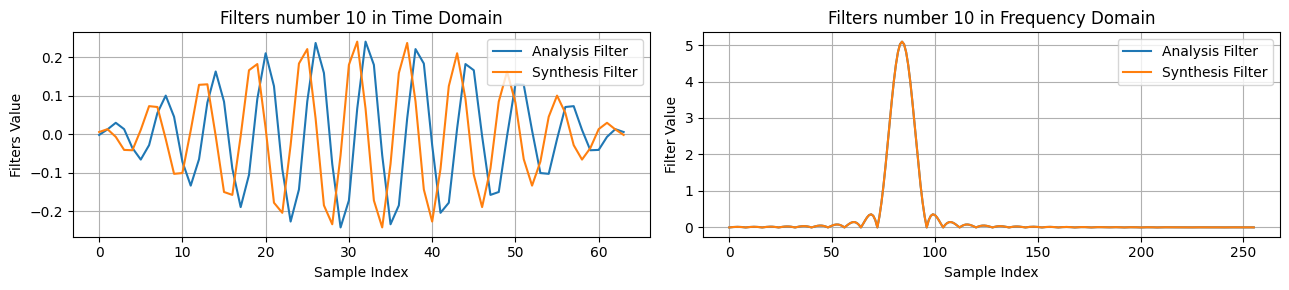

In [169]:
# 2.0

def analysis_filter(M, k):
    L = 2 * M
    n = np.arange(L)
    hk = np.sin((n + 0.5) * np.pi / (2 * M)) * np.sqrt(2 / M) * np.cos(((2 * n + M + 1) * (2 * k + 1) * np.pi) / (4 * M))
    return hk

def synthesis_filter(M, k):
    return analysis_filter(M, k)[::-1]  # Reverse the analysis filter to get the synthesis filter

M = 32  # Number of filters
analysis_filters = [analysis_filter(M, k) for k in range(M)]
synthesis_filters = [synthesis_filter(M, k) for k in range(M)]

# Plot filters
plt.figure(figsize=(13, 3))
plt.subplot(1, 2, 1)
plt.plot(analysis_filters[10], label='Analysis Filter')
plt.plot(synthesis_filters[10], label='Synthesis Filter')
plt.title(f'Filters number 10 in Time Domain')
plt.xlabel('Sample Index')
plt.ylabel('Filters Value')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(abs(np.fft.fft(analysis_filters[10], 512)[:256]), label='Analysis Filter')
plt.plot(abs(np.fft.fft(synthesis_filters[10], 512)[:256]), label='Synthesis Filter')
plt.title(f'Filters number 10 in Frequency Domain')
plt.xlabel('Sample Index')
plt.ylabel('Filter Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

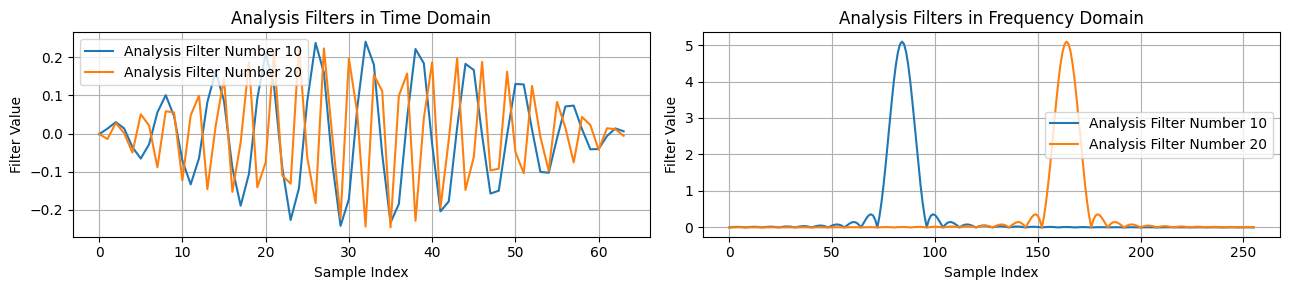

In [170]:
# 2.0

# Plot analysis filters
plt.figure(figsize=(13, 3))
plt.subplot(1, 2, 1)
plt.plot(analysis_filters[10], label='Analysis Filter Number 10')
plt.plot(analysis_filters[20], label='Analysis Filter Number 20')
plt.title(f'Analysis Filters in Time Domain')
plt.xlabel('Sample Index')
plt.ylabel('Filter Value')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(abs(np.fft.fft(analysis_filters[10], 512)[:256]), label='Analysis Filter Number 10')
plt.plot(abs(np.fft.fft(analysis_filters[20], 512)[:256]), label='Analysis Filter Number 20')
plt.title(f'Analysis Filters in Frequency Domain')
plt.xlabel('Sample Index')
plt.ylabel('Filter Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show

In [171]:
# 2.3

import numpy as np

def upsample(signal, factor):
    # Create an array of zeros with the required length
    upsampled_signal = np.zeros(len(signal) * factor - (factor - 1), dtype=signal.dtype)
    
    # Copy the original signal values to every `factor`-th element of the upsampled signal
    upsampled_signal[::factor] = signal
    # Add one additional zero at the end
    upsampled_signal = np.pad(upsampled_signal, (0, factor-1), mode='constant')
    return upsampled_signal

In [172]:
# 2.1

def filterbank_analysis(x):
    M = 32  # Number of filters
    analysis_filters = [analysis_filter(M, k) for k in range(M)]
    v = np.zeros((np.convolve(x, analysis_filters[12])[0::M].shape[0], M))
    # Segment total signal into windows, apply windows, and compute FFT
    for k in range(M):
        v[:, k] = np.convolve(x, analysis_filters[k])[0::M]
    return v

# 2.3

def filterbank_synthesis(quan_y_k):
    M = 32  # Number of filters
    synthesis_filters = [synthesis_filter(M, k) for k in range(M)]
    w_k = np.zeros((upsample(quan_y_k[:, 0], M).shape[0], M))
    w = np.zeros((np.convolve(upsample(quan_y_k[:, 0], M), synthesis_filters[0]).shape[0], M))
    reconstructed_segment = np.zeros(quan_y_k.shape[0])
    for q in range(M):
        w_k[:, q] = upsample(quan_y_k[:, q], M)
        w[:, q] = np.convolve(w_k[:, q], synthesis_filters[q])
    reconstructed_segment = np.sum(w, axis=1)
    return reconstructed_segment

In [173]:
# 2.2

def adaptive_quantizer(segment, T_g_segment):
    y_k = filterbank_analysis(segment)
    quantized_y_k = np.zeros_like(y_k)
    for q in range(M):
        low = 8*q
        high = 8*(q+1)-1
        T_g_min = np.min(T_g_segment[low:high])
        R = 2 ** 16
        B_k = int(np.ceil((np.log2((R / T_g_min) - 1))))
        levels = 2 ** B_k
        # Define partition for the quantization
        min_y_q = np.min(y_k[:, q])
        max_y_q = np.max(y_k[:, q])
        D = (max_y_q - min_y_q) / levels
        partition = min_y_q + np.arange(1, levels) * D
        # Define codebook for the quantization
        codebook = min_y_q + np.arange(levels) * D + D / 2
        index = np.digitize(y_k[:, q], partition)
        quantized_y_k[:, q] = codebook[index]
    # 2.3   
    rec_seg = filterbank_synthesis(quantized_y_k)
    return rec_seg

In [174]:
# 2.2

def eight_bit_quantizer(segment, T_g_segment):
    y_k = filterbank_analysis(segment)
    quantized_y_k = np.zeros_like(y_k)
    for q in range(M):
        R = 2 ** 16
        B_k = 8
        levels = 2 ** B_k
        # Define partition for the quantization
        min_y_q = -1
        max_y_q = +1
        D = (max_y_q - min_y_q) / levels
        partition = min_y_q + np.arange(1, levels) * D
        # Define codebook for the quantization
        codebook = min_y_q + np.arange(levels) * D + D / 2
        index = np.digitize(y_k[:, q], partition)
        quantized_y_k[:, q] = codebook[index]
    # 2.3   
    rec_seg = filterbank_synthesis(quantized_y_k)
    return rec_seg

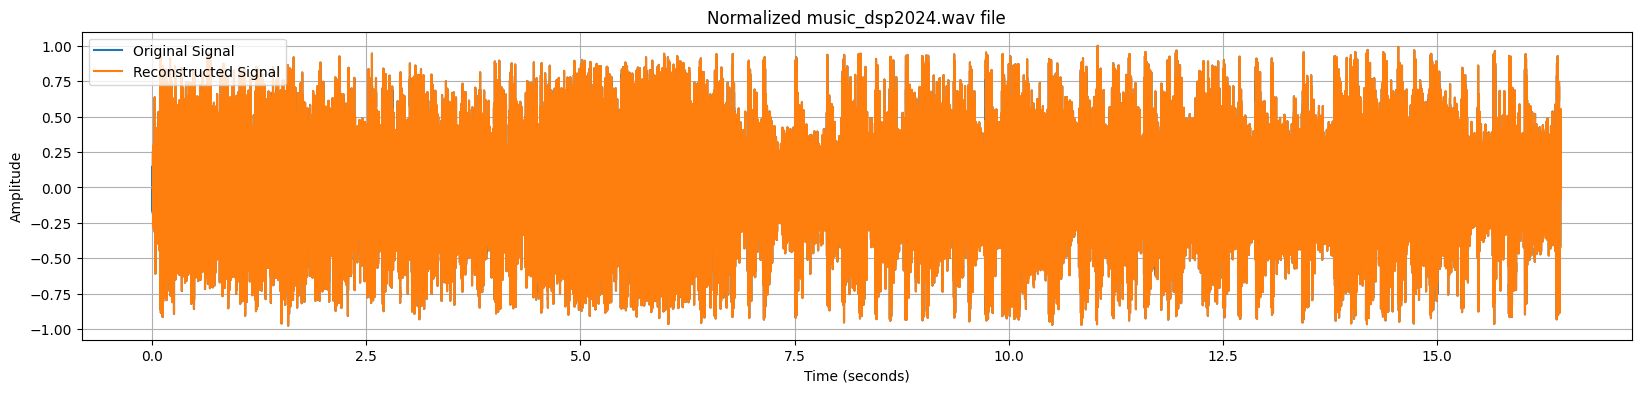

In [194]:
# Main Code for Adaptive quantizer

final_signal = []
L = 512
for segment_idx, i in enumerate(range(0, len(music_padded), L + hop_size)):
    segment = music_padded[i:i + L]
    final_signal.append(adaptive_quantizer(segment, T_g[:, segment_idx]))

final_signal = np.array(final_signal)

L = final_signal.shape[1]
R = 512
reconstructed_signal = final_signal[:R, 0]

for frame in range(1, final_signal.shape[0]):
    temp_reconstructed_y = final_signal[frame-1, R:L] + final_signal[frame, 0:L-R]
    reconstructed_signal = np.concatenate((reconstructed_signal, temp_reconstructed_y))
    reconstructed_signal = np.concatenate((reconstructed_signal, final_signal[frame, L-R:R]))

# Ignore the first 2M samples
reconstructed_signal = reconstructed_signal[2*M:]

IPython.display.display(IPython.display.Audio(reconstructed_signal, rate=fs))
sf.write("adaptive_quantizer.wav", reconstructed_signal, fs)

# Plotting
fig = plt.figure(figsize=(20, 4))
time = np.arange(len(music)) / fs
time_rec = np.arange(len(reconstructed_signal)) / fs
plt.plot(time, music, label='Original Signal')
plt.plot(time_rec,reconstructed_signal, label='Reconstructed Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Normalized music_dsp2024.wav file')
plt.grid(True)
plt.legend()
plt.show()

In [195]:
# Main Code for 8-bit quantizer

final_signal = []
L = 512
for segment_idx, i in enumerate(range(0, len(music_padded), L + hop_size)):
    segment = music_padded[i:i + L]
    final_signal.append(eight_bit_quantizer(segment, T_g[:, segment_idx]))

final_signal = np.array(final_signal)

L = final_signal.shape[1]
R = 512
reconstructed_signal = final_signal[:R, 0]

for frame in range(1, final_signal.shape[0]):
    temp_reconstructed_y = final_signal[frame-1, R:L] + final_signal[frame, 0:L-R]
    reconstructed_signal = np.concatenate((reconstructed_signal, temp_reconstructed_y))
    reconstructed_signal = np.concatenate((reconstructed_signal, final_signal[frame, L-R:R]))

# Ignore the first 2M samples
reconstructed_signal = reconstructed_signal[2*M:]

IPython.display.display(IPython.display.Audio(reconstructed_signal, rate=fs))
sf.write("8bit_quantizer.wav", reconstructed_signal, fs)

# Plotting
fig = plt.figure(figsize=(20, 4))
time = np.arange(len(music)) / fs
time_rec = np.arange(len(reconstructed_signal)) / fs
plt.plot(time, music, label='Original Signal')
plt.plot(time_rec,reconstructed_signal, label='Reconstructed Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Normalized music_dsp2024.wav file')
plt.grid(True)
plt.legend()
plt.show()